# MNIST classification using a SGD classifier and Scikit-Learn functions

### A few packages to get you going
* We'll be loading many more throughout the tutorial
* Download the dataset by executing the proceeding cells

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_auc_score


In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

* Print dictionary keys

In [6]:
#Print dictionary keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

* Save the contents of the data and target from the MNIST dictionary into data_array and target array variables
    * Also print out the shape of data_array
* Notice the type of the target array – convert this to np.uint8 using the astype() method

In [7]:
#Save contents of target and data to np arrays
target_array = mnist.target
data_array = mnist.data

type(target_array[0])

str

In [93]:
#Print shape of the data array
np.shape(data_array)
print(data_array[0:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#Change the type of target array
target_array = mnist.target.astype(np.uint8)
type(target_array[0])

numpy.uint8

* Print and glance over the description given in the mnist dictionary
* Plot an image of the very first image in the dataset (matplotlib imshow)

* Bonus ACTIVITY: Write a function that takes in the index of a sample and plots it


In [10]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

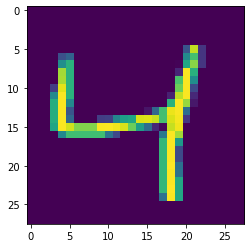

In [11]:
plt.imshow(data_array[2].reshape(28,28))

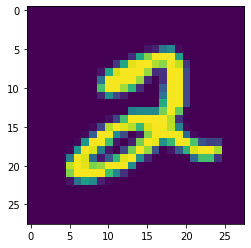

In [12]:
def index_plot(i):
    plt.imshow(data_array[i].reshape(28,28))
    
index_plot(5)

### train_test_split
* turn off shuffle

In [13]:
data_train, data_test, target_train, target_test = train_test_split(data_array, target_array, shuffle=False)


In [14]:
np.shape(target_train)
target_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Make a new target array (for only train dataset) that is composed of Boolean values (True for 5s and False for not 5s)
* Name the new array target_array_train_5


In [15]:
target_train_5 = target_train == 5

In [16]:
target_train_5[0:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

### SGDClassifier
* Name it sgd_clf
* Fit the model to the data with the fives target
* Check to see if it worked using the predict function on a specific sample you know is a 5; also a sample you know is not a 5
    * Individual predictions will require a reshape (necessary command will appear in error)


In [17]:
sgd_clf = linear_model.SGDClassifier()

In [18]:
sgd_clf.fit(data_train, target_train_5)

SGDClassifier()

In [19]:
sgd_clf.predict(data_train[0].reshape(1, -1))

array([ True])

### StandardScaler

In [58]:
scaler = StandardScaler()
scaler.fit(data_train)
data_train_scaled = scaler.transform(data_train)

In [94]:
scaler = StandardScaler()
scaler.fit(target_train)
data_train_scaled = scaler.transform(target_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5. 0. 4. ... 7. 1. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
sgd_clf.predict(data_train_scaled[0:10])

array([5, 0, 1, 1, 7, 0, 1, 0, 1, 4], dtype=uint8)

### cross_val_score
* Implement it using 3-fold cross validation, scoring for accuracy


In [22]:
cross_val_score(sgd_clf, data_train, target_train_5, cv = 3)

array([0.9648    , 0.97114286, 0.96737143])

### Calculate the accuracy if the model always predicted not-5


In [23]:
all_the_true = target_train_5.sum()
all_the_true, target_train_5.shape

(4739, (52500,))

In [24]:
accuracy_not5 = 100-((all_the_true/52500)*100)
accuracy_not5, target_train_5.shape


(90.97333333333333, (52500,))

### cross_val_predict 
* Name the array of predictions target_array_train_5_pred

In [25]:
target_array_train_5_pred = cross_val_predict(sgd_clf, data_train, target_train_5, cv = 3)
print(target_array_train_5_pred[0:10])

[ True False False False False False False False False False]


### precision_score; recall_score

In [26]:
precision_score(target_train_5 ,target_array_train_5_pred, average = 'binary')

0.896993152724025

In [27]:
recall_score(target_train_5 ,target_array_train_5_pred, average = 'binary')

0.6357881409580081

In [28]:
precision_recall_fscore_support(target_train_5, target_array_train_5_pred, average = 'binary')

(0.896993152724025, 0.6357881409580081, 0.7441343541615214, None)

### roc_curve
* Run cross_val_predict as before, but add method='decision_function'
* Use matplotlib plot to create ROC curve figure

In [29]:
target_train_5_pred = cross_val_predict(sgd_clf, data_train, target_train_5, cv = 3, method = 'decision_function')
print(target_train_5_pred[0:10])

[  5160.31145254 -20402.86864084 -26346.57092947 -19729.45548154
 -20986.41847456 -11616.89969798  -8531.30058841 -19055.31788256
  -5353.73317759 -13688.3816651 ]


In [30]:
fpr, tpr, thresholds = metrics.roc_curve(target_train_5 ,target_train_5_pred)

In [31]:
print(fpr, tpr, thresholds)

[0.00000000e+00 0.00000000e+00 2.09375851e-05 ... 9.99099684e-01
 9.99099684e-01 1.00000000e+00] [0.00000000e+00 2.11014982e-04 2.11014982e-04 ... 9.99788985e-01
 1.00000000e+00 1.00000000e+00] [  38728.19102206   38727.19102206   38091.89133085 ...  -97633.02162125
  -99692.68625855 -145237.62329155]


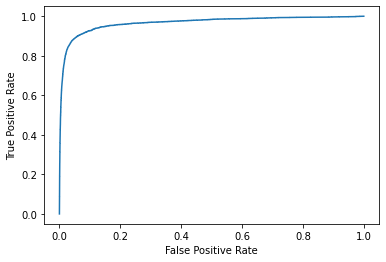

In [32]:
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### roc_auc_score

In [33]:
metrics.roc_auc_score(target_train_5 ,target_train_5_pred)

0.9664261383345052

### Find the cross_val_pred for the SGD classifier using all 10 classes (change targets)
* Use a new variable target_array_train_pred to save predictions 

In [84]:
sgd_clf = linear_model.SGDClassifier()

In [85]:
sgd_clf.fit(data_train, target_train)

SGDClassifier()

In [86]:
print(sgd_clf.predict(data_train[0:50]))
print(target_array[0:50])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 5 9 4 0 9 1 1 8 4 3 7 7 3 8 6 7 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 5 3]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [87]:
#cross val score
cross_val_score(sgd_clf, data_train, target_train, cv=3)

array([0.86297143, 0.87422857, 0.85897143])

In [88]:
#cross val score for scaled data
cross_val_score(sgd_clf, data_train_scaled, target_train, cv=3)

array([0.90017143, 0.89948571, 0.89165714])

In [89]:
#cross val predict
target_array_train_pred = cross_val_predict(sgd_clf, data_train, target_train, cv = 3)
print(target_array_train_pred[0:25])

[3 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


In [90]:
#cross val predict for scaled data 
target_array_train_pred = cross_val_predict(sgd_clf, data_train_scaled, target_train, cv = 3)
print(target_array_train_pred[0:25])

/Users/nicolejackson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[3 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 3]


In [91]:
#precision recall
precision_recall_fscore_support(target_train, target_array_train_pred, average = 'macro')


(0.9054161001533882, 0.8983418271709448, 0.8998909581857989, None)

In [92]:
#precision recall for scaled data
precision_recall_fscore_support(target_train_scaled, target_array_train_pred, average = 'macro')

NameError: name 'target_train_scaled' is not defined

### confusion_matrix

In [83]:
from sklearn.metrics import confusion_matrix
#visualise what class-wise errors are being made by your model. e.g. how many 5s are being mistaken for 8s
con_mat = confusion_matrix(target_train, target_array_train_pred)
print(con_mat)

[[4907    0  121   21   14   21   21    3   63   13]
 [   3 5316  123   98   10   19   10   12  342   15]
 [  53   44 4499   97   65   29   56   50  283   27]
 [  32   17  313 4419   16  151   12   57  280   54]
 [  33   12   90   29 4117   35   40   49  468  216]
 [  80   17  113  320  100 3442   67   29  497   74]
 [  51   15  185   14   60  107 4627    6  133    6]
 [  16   12   87   44   90   28    3 4689   89  391]
 [  55   53  140  337   64  117   17   17 4179  125]
 [  33   16   49   90  149   88    2  231  423 4148]]


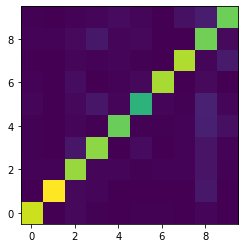

In [82]:
plt.imshow(con_mat, origin='lower')
